In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import xarray as xr
import numpy as np

import importlib

import regrid

In [2]:
clobber = False
method = 'bilinear'
src_grid_name = 'POP_gx1v7'
dst_grid_name = 'POP_tx0.1v3'

R = regrid.regridder(src_grid_name, 
                     dst_grid_name, 
                     method = method,                      
                     clobber = clobber)


In [3]:
dst_mask = regrid.util.mask_3d_POP(dst_grid_name)
dst_vert = regrid.util.open_vertical_grid(dst_grid_name)

src_mask = regrid.util.mask_3d_POP(src_grid_name)
src_vert = regrid.util.open_vertical_grid(src_grid_name)


In [12]:
file = '/glade/scratch/mclong/archive/g.e21a01d.G1850ECOIAF.T62_g17.extraterr-fe.001/rest/0241-01-01-00000/g.e21a01d.G1850ECOIAF.T62_g17.extraterr-fe.001.pop.r.0241-01-01-00000.nc'
ds = xr.open_dataset(file,decode_times=False,decode_coords=False)

varlist = [
    'PO4','NO3','SiO3','NH4','Fe','Lig','O2','DIC','DIC_ALT_CO2','ALK',
    'ALK_ALT_CO2','DOC','DON','DOP','DOPr','DONr','DOCr','zooC',
    'spChl','spC','spP','spFe','spCaCO3','diatChl','diatC','diatP','diatFe',
    'diatSi','diazChl','diazC','diazP','diazFe']
ds = ds.rename({f'{v}_CUR':v for v in varlist})

ds = ds.drop([v for v in ds.variables if v not in varlist])
ds = ds.rename({'k': 'z_t', 'j': 'nlat', 'i': 'nlon'})
ds.z_t.values = src_vert.z_t
ds = ds.where(src_mask)
ds.attrs = {}
ds

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    PO4          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    NO3          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    SiO3         (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    NH4          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    Fe           (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    Lig          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    O2           (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    DIC          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    DIC_ALT_CO2  (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan nan
    ALK          (z_t, nlat, nlon) float64 nan nan nan nan ... nan nan nan

In [20]:
dso = xr.Dataset()
for v in varlist: 
    print(f'remapping {v}')
    da_v = R(ds[v], 
             renormalize=True, 
             apply_mask = dst_mask,
             interp_coord = {'z_t': dst_vert.z_t},
             post_method = regrid.util.fill_ocean_POP,
             post_method_kwargs = {'mask': dst_mask,
                                   'ltripole': False})
    dso[v] = da_v
    break
dso

remapping PO4


/gpfs/u/home/mclong/p/regrid/regrid/regrid.py:140: RuntimeWarning: invalid value encountered in greater
  data_dst = np.where(ones_dst > 0., data_dst, np.nan)


<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, z_t: 62)
Coordinates:
  * z_t      (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.625e+05 5.875e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    PO4      (z_t, nlat, nlon) float64 nan nan nan nan nan ... nan nan nan nan

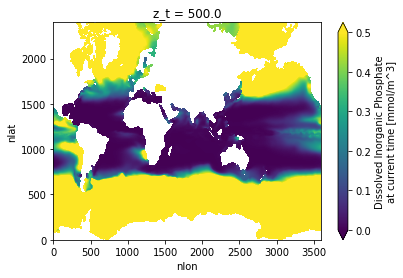

In [27]:
dso.PO4.isel(z_t=0).plot(vmin = 0,vmax=0.5)

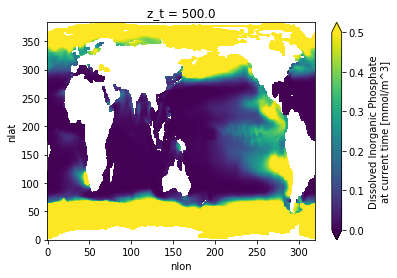

In [17]:
ds.PO4.isel(z_t=0).plot(vmin = 0,vmax=0.5)